### Simulaciones

In [379]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter, group_delay

def plot_filter_digital(b, a, fs):
    # Frecuencia de respuesta (para ver el módulo y fase del filtro)
    w, h = freqz(b, a, fs=fs)

    # w = w * fs / (2 * np.pi)

    # Mostrar el módulo y la fase del filtro
    plt.figure()

    plt.subplot(2, 1, 1)
    plt.plot(w, np.abs(h))
    plt.title('Módulo del filtro')
    plt.ylabel('Módulo')

    plt.subplot(2, 1, 2)
    plt.plot(w, np.angle(h))
    plt.title('Fase del filtro')
    plt.ylabel('Fase (radianes)')
    plt.xlabel('Frecuencia (rad/muestra)')

    plt.tight_layout()

    w, gd = group_delay((b, a), fs=fs)

    # Graficar el retardo de grupo
    plt.figure()
    plt.plot(w, gd)
    plt.title('Retardo de grupo del filtro')
    plt.xlabel('Frecuencia (rad/muestra)')
    plt.ylabel('Retardo de grupo (muestras)')
    plt.grid()

    plt.tight_layout()

    plt.show()

def plot_filter_signal(b, a, input):
    # Aplicar el filtro a la señal rampa
    salida = lfilter(b, a, input)

    # Graficar señal de entrada y filtrada
    plt.figure()

    plt.subplot(2, 1, 1)
    plt.stem(input)
    plt.title('Señal de entrada')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    # plt.xlim((0, 100))
    # plt.legend()

    plt.subplot(2, 1, 2)
    plt.stem(salida)
    plt.title('Señal filtrada')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    # plt.xlim((0, 100))
    # plt.legend()

    plt.show()

In [380]:
# Parámetros de la señal senoidal
fs = 1000
# frecuencia = 50/fs  # Frecuencia de la señal en Hz
frecuencia = 350
t = np.arange(0, .1, 1/fs)  # Vector de tiempo de 1 segundo
amplitud = 1  # Amplitud de la señal
fase = 0  # Fase inicial en radianes


# Generar señal senoidal
senoidal = amplitud * np.sin(2 * np.pi * frecuencia * t + fase)

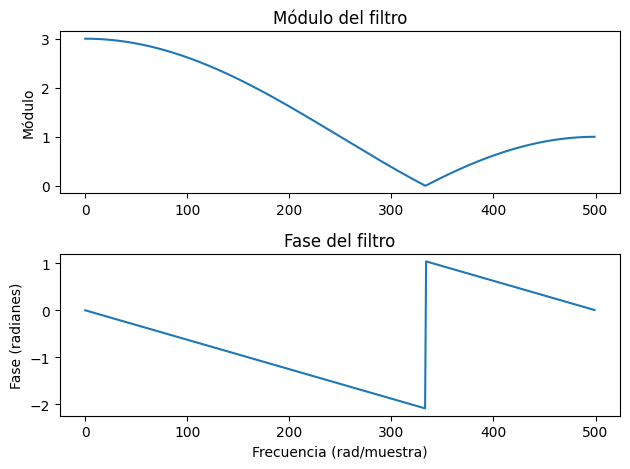

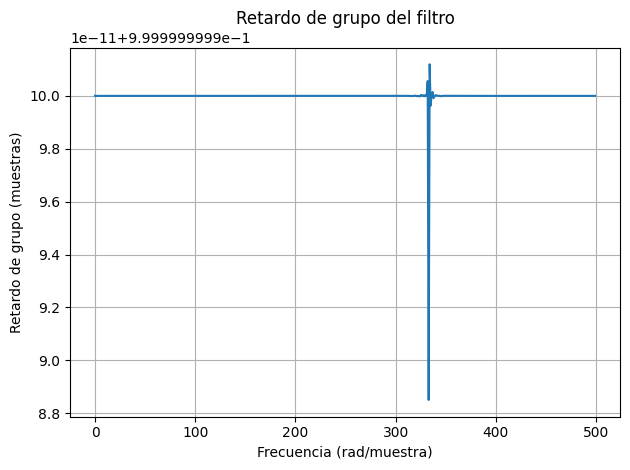

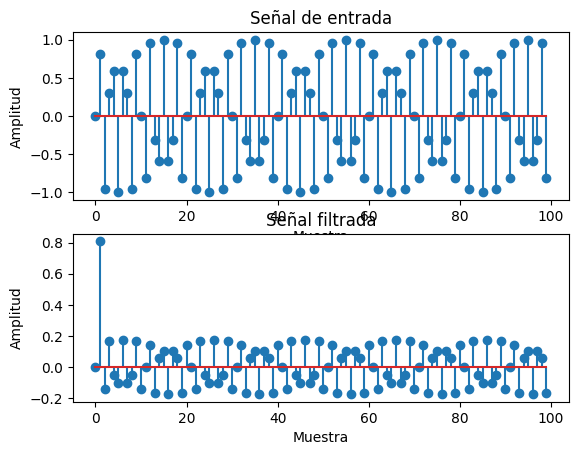

In [381]:
b = [1,1,1]
a = [1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)

/tmp/ipykernel_10988/4043758896.py:27: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = group_delay((b, a), fs=fs)


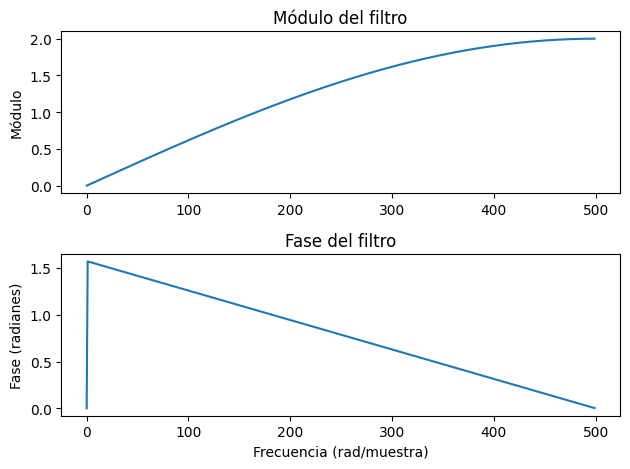

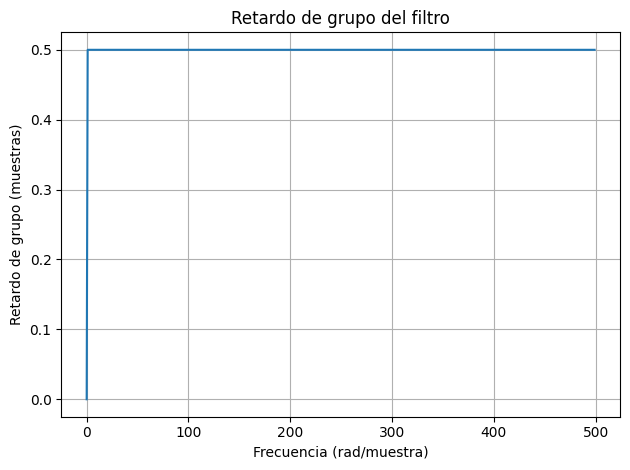

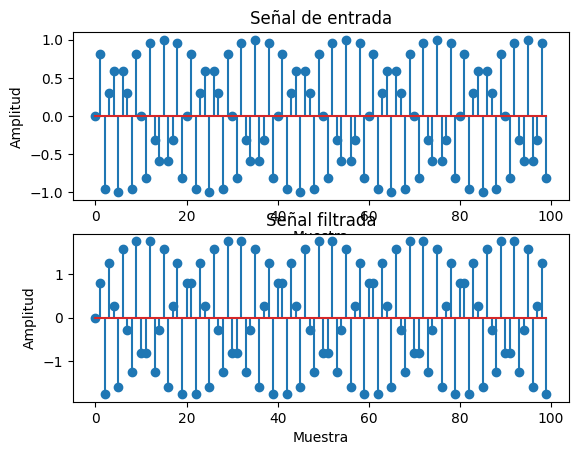

In [382]:
b = [1,-1]
a = [1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)

### Verificacion de diferenciador de segundo orden

/tmp/ipykernel_10988/4043758896.py:27: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = group_delay((b, a), fs=fs)


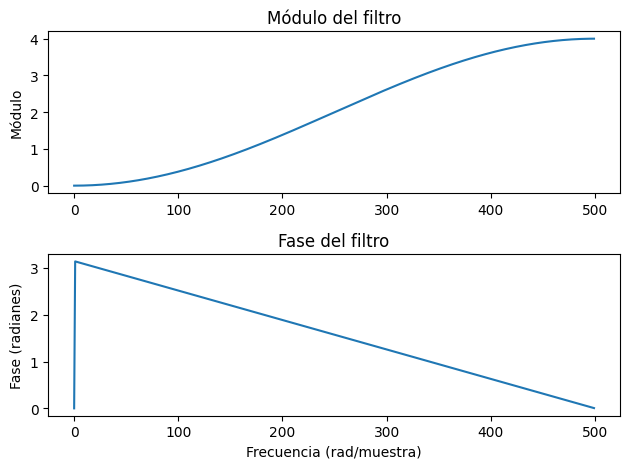

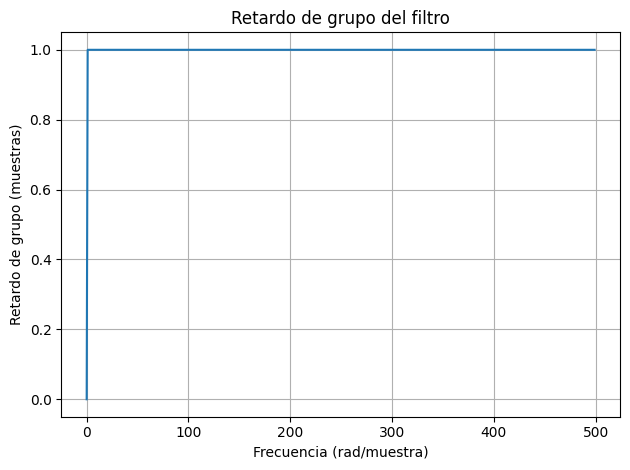

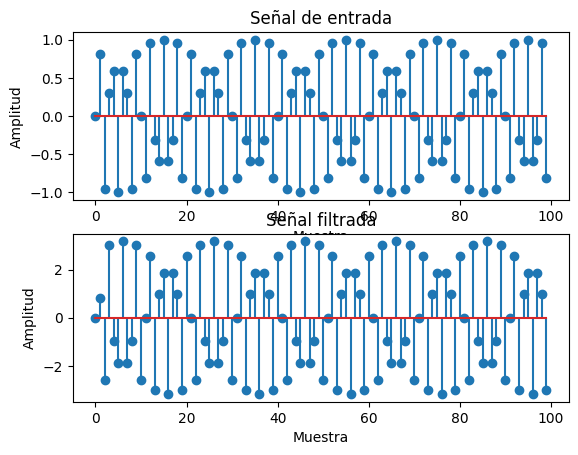

In [383]:
b = [1, -2, 1]
a = [1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)

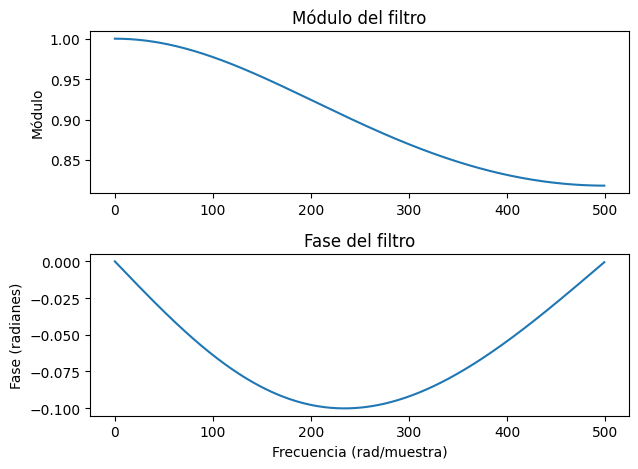

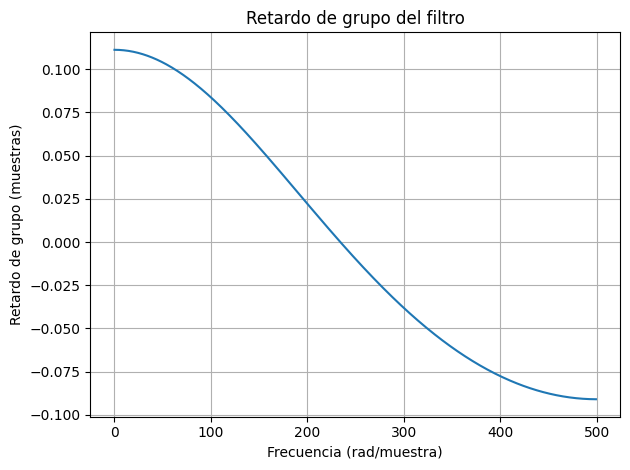

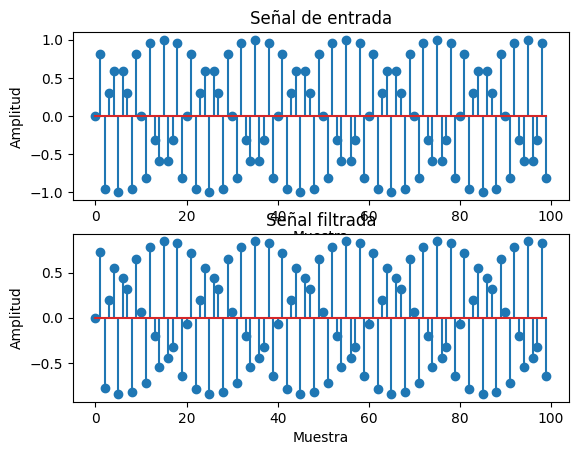

In [384]:
b = [.9]
a = [1, -.1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)

/tmp/ipykernel_10988/4043758896.py:27: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = group_delay((b, a), fs=fs)


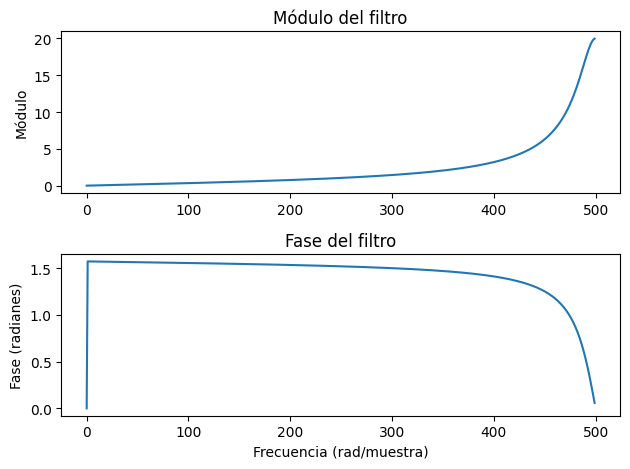

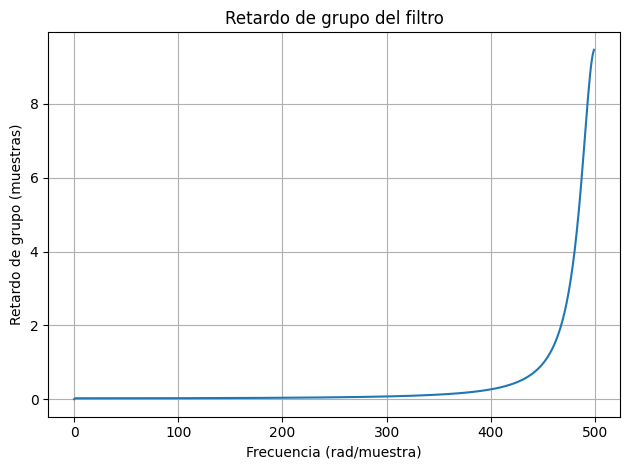

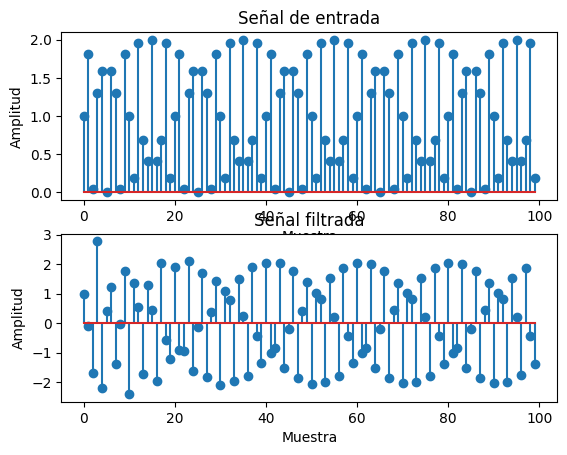

In [385]:
DC = 1

b = [1,-1]
a = [1,.9]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal + DC)

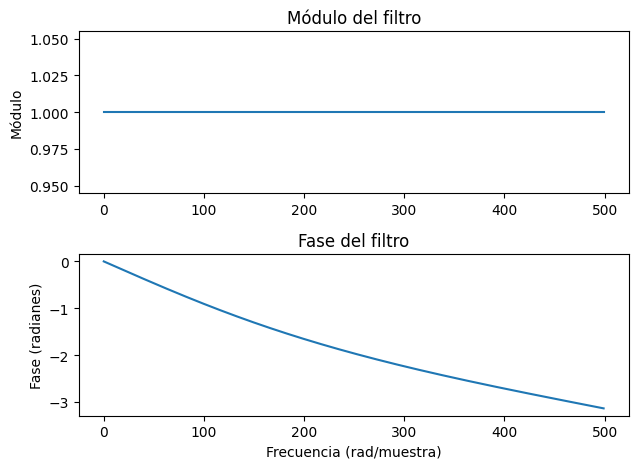

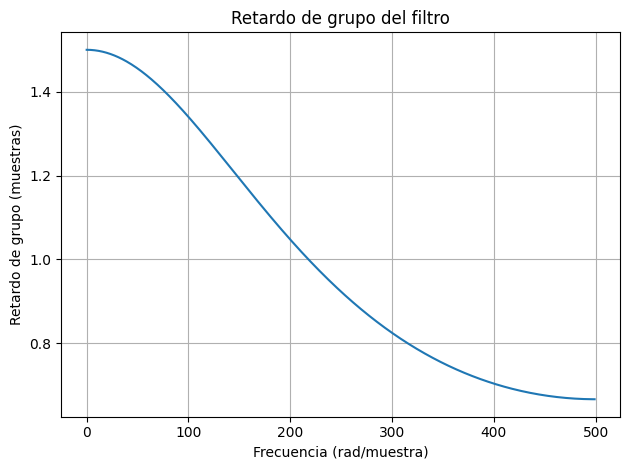

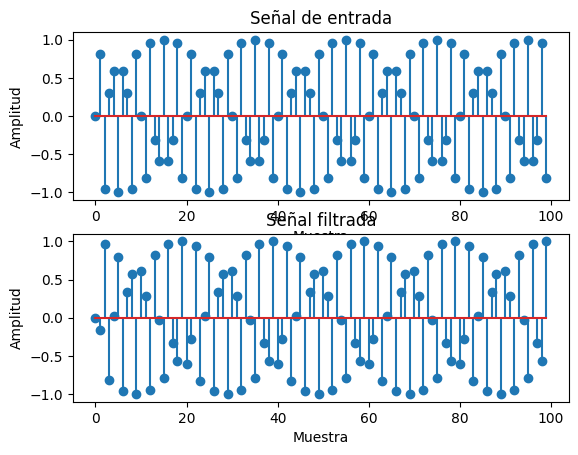

In [386]:
D = 0.5
R = -D/(D+2)

b = [R, 1]
a = [1, R]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)

/tmp/ipykernel_10988/4043758896.py:27: UserWarning: The filter's denominator is extremely small at frequencies [1.571],             around which a singularity may be present
  w, gd = group_delay((b, a), fs=fs)


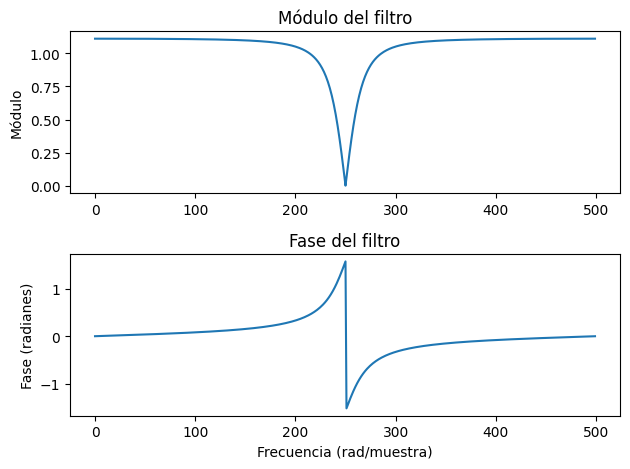

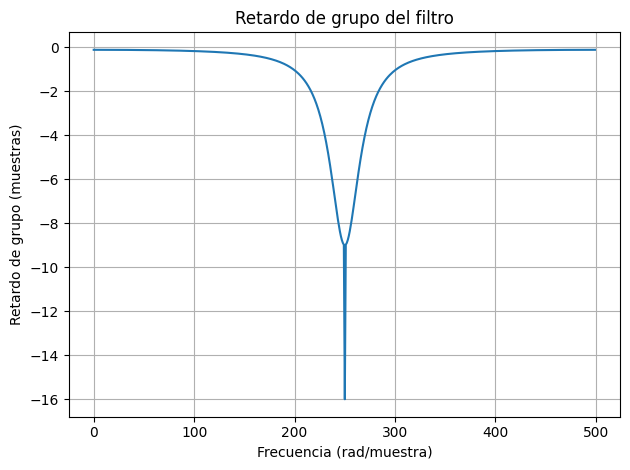

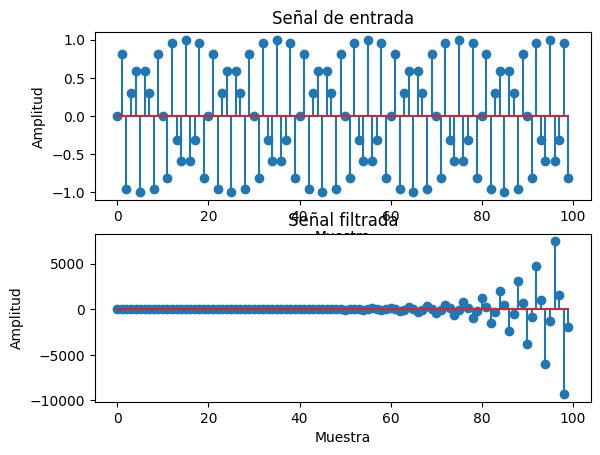

In [387]:
b = [1, 0, 1]
a = [.8, 0, 1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)